In [33]:
import pandas as pd
data = pd.read_excel("DATA/Train/serration_prediction_train.xlsx")
data = data.drop('result', axis=1)

data.head()

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
0,indeterminate,V,V,single,single,absent,absent,single,absent,single,not marked
1,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,single,not marked
2,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked
3,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked
4,indeterminate,I/,V,single,bilateral,absent,absent,single,absent,bilateral,not marked


In [34]:
!pip install researchpy
import researchpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# p-value for each combination of variables
corr_data = []
for var1 in data:
    row = []
    for var2 in data:
        _, res = researchpy.crosstab(data[var1], data[var2], test='chi-square')
        row.append(res['results'][1])
    corr_data.append(row)

df = pd.DataFrame(corr_data, data.columns, data.columns)
df

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
shape,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0056,0.0236,0.0011,0.0000
profile_entrance,0.0000,0.0000,0.0000,0.0000,0.0158,0.0069,0.0046,0.0539,0.1448,0.6008,0.0016
profile_exit,0.0000,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,0.0093,0.0438,0.0000,0.0000
rising_entrance,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0002,0.0055,0.0144,0.0011
rising_exit,0.0000,0.0158,0.0048,0.0000,0.0000,0.0138,0.0004,0.0663,0.0002,0.0000,0.0087
shards,0.0000,0.0069,0.0000,0.0005,0.0138,0.0000,0.0000,0.0056,0.0011,0.0000,0.0000
feathering,0.0002,0.0046,0.0000,0.0000,0.0004,0.0000,0.0000,0.0001,0.0013,0.0000,0.0000
entrance_mounding,0.0056,0.0539,0.0093,0.0002,0.0663,0.0056,0.0001,0.0000,0.0000,0.0000,0.0000
center_mounding,0.0236,0.1448,0.0438,0.0055,0.0002,0.0011,0.0013,0.0000,0.0000,0.0000,0.0000
exit_mounding,0.0011,0.6008,0.0000,0.0144,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


<AxesSubplot:>

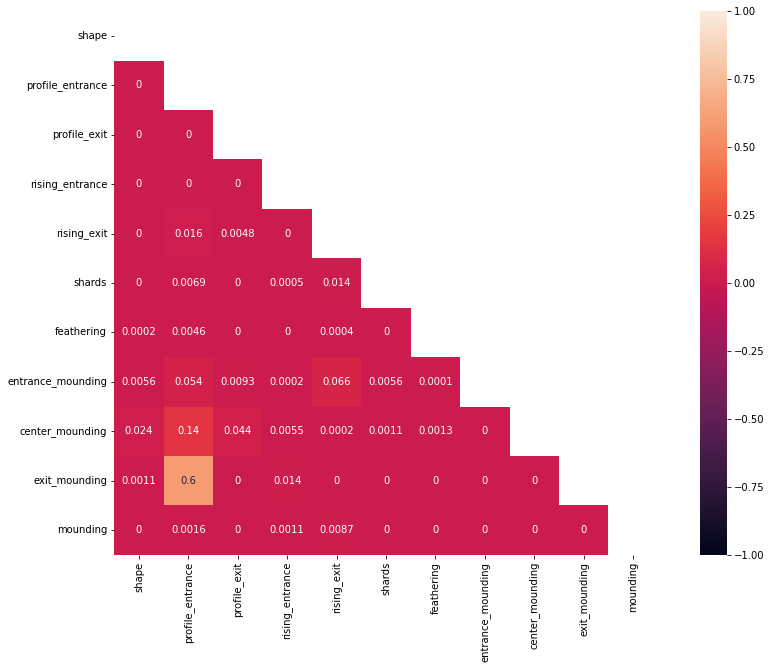

In [36]:
# Mask out top right part
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(df, mask=mask,vmin=-1, vmax=1, square=True, annot=True)

In [37]:
# pearson chi-square for each combination of variables
corr_data = []
for var1 in data:
    row = []
    for var2 in data:
        _, res = researchpy.crosstab(data[var1], data[var2], test='chi-square')
        row.append(res['results'][0])
    corr_data.append(row)

df = pd.DataFrame(corr_data, data.columns, data.columns)
df

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
shape,560.0000,90.1908,45.0747,27.6935,41.0074,33.7754,22.5659,14.6062,11.2788,18.1631,56.0395
profile_entrance,90.1908,280.0000,39.0117,22.6011,8.2972,7.3062,10.7698,5.8421,3.8652,1.0191,19.3591
profile_exit,45.0747,39.0117,280.0000,21.5744,10.6857,30.9085,42.2892,9.3492,6.2579,22.7655,41.7968
rising_entrance,27.6935,22.6011,21.5744,560.0000,99.7249,15.0317,36.0213,22.0570,14.6482,12.4300,29.2836
rising_exit,41.0074,8.2972,10.6857,99.7249,560.0000,8.5649,20.6046,8.8017,21.6209,37.7187,23.6232
shards,33.7754,7.3062,30.9085,15.0317,8.5649,280.0000,50.7821,10.3878,13.6004,32.9821,53.7230
feathering,22.5659,10.7698,42.2892,36.0213,20.6046,50.7821,560.0000,24.5243,17.8811,45.5719,71.8626
entrance_mounding,14.6062,5.8421,9.3492,22.0570,8.8017,10.3878,24.5243,560.0000,76.8133,75.5547,89.9084
center_mounding,11.2788,3.8652,6.2579,14.6482,21.6209,13.6004,17.8811,76.8133,560.0000,111.5301,79.0772
exit_mounding,18.1631,1.0191,22.7655,12.4300,37.7187,32.9821,45.5719,75.5547,111.5301,560.0000,164.5239


In [38]:
# degree-of-freedom for each combination of variables
corr_data = []
for var1 in data:
    row = []
    for var2 in data:
        contTable = pd.crosstab(data[var1], data[var2])
        row.append(min(contTable.shape[0], contTable.shape[1]) - 1)
    corr_data.append(row)

df = pd.DataFrame(corr_data, data.columns, data.columns)
df

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
shape,2,1,1,2,2,1,2,2,2,2,2
profile_entrance,1,1,1,1,1,1,1,1,1,1,1
profile_exit,1,1,1,1,1,1,1,1,1,1,1
rising_entrance,2,1,1,2,2,1,2,2,2,2,2
rising_exit,2,1,1,2,2,1,2,2,2,2,2
shards,1,1,1,1,1,1,1,1,1,1,1
feathering,2,1,1,2,2,1,2,2,2,2,2
entrance_mounding,2,1,1,2,2,1,2,2,2,2,2
center_mounding,2,1,1,2,2,1,2,2,2,2,2
exit_mounding,2,1,1,2,2,1,2,2,2,2,2


In [39]:
# cramer-v for each combination of variables
corr_data = []
for var1 in data:
    row = []
    for var2 in data:
        _, res = researchpy.crosstab(data[var1], data[var2], test='chi-square')
        row.append(res['results'][2])
    corr_data.append(row)

df = pd.DataFrame(corr_data, data.columns, data.columns)
df

,shape,profile_entrance,profile_exit,rising_entrance,rising_exit,shards,feathering,entrance_mounding,center_mounding,exit_mounding,mounding
shape,1.0000,0.5675,0.4012,0.2224,0.2706,0.3473,0.2007,0.1615,0.1419,0.1801,0.3163
profile_entrance,0.5675,1.0000,0.3733,0.2841,0.1721,0.1615,0.1961,0.1444,0.1175,0.0603,0.2629
profile_exit,0.4012,0.3733,1.0000,0.2776,0.1954,0.3322,0.3886,0.1827,0.1495,0.2851,0.3864
rising_entrance,0.2224,0.2841,0.2776,1.0000,0.4220,0.2317,0.2536,0.1985,0.1617,0.1490,0.2287
rising_exit,0.2706,0.1721,0.1954,0.4220,1.0000,0.1749,0.1918,0.1254,0.1965,0.2595,0.2054
shards,0.3473,0.1615,0.3322,0.2317,0.1749,1.0000,0.4259,0.1926,0.2204,0.3432,0.4380
feathering,0.2007,0.1961,0.3886,0.2536,0.1918,0.4259,1.0000,0.2093,0.1787,0.2853,0.3582
entrance_mounding,0.1615,0.1444,0.1827,0.1985,0.1254,0.1926,0.2093,1.0000,0.3704,0.3673,0.4007
center_mounding,0.1419,0.1175,0.1495,0.1617,0.1965,0.2204,0.1787,0.3704,1.0000,0.4463,0.3758
exit_mounding,0.1801,0.0603,0.2851,0.1490,0.2595,0.3432,0.2853,0.3673,0.4463,1.0000,0.5420


<AxesSubplot:>

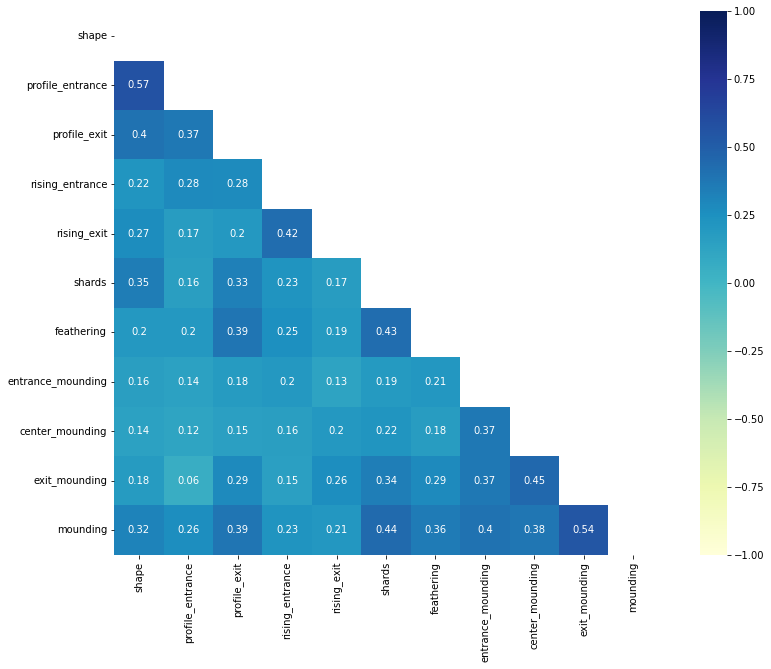

In [40]:
# Mask out top right part
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(df, mask=mask,vmin=-1, vmax=1, square=True, annot=True, cmap = "YlGnBu")